###
evaluating k means clustering model
objectives:
1. Implement and evaluate the performance of k-means clustering on synthetic data
2. Interpret various evaluation metrics and visualizations
3. Compare clustering results against known classes unsing synthetic data

this lab will enhance the knowledge in:
1. Generate synthetic data for running targeted experiments using scikit-learn
2. Create k-means models and evaluate their comparative performance
3. Investigate evaluation metrics and techniques for assessing clustering results

In [1]:
#importing all the necessary libaries:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.patches import Patch
from matplotlib import cm

In [12]:
def eval_clustering(X,labels,n_cluster,ax=None, title_suffix=''):
    """
    Evaluate a clustering model using silhouette scores and the Davies-Bouldin index.
    
    Parameters:
    X (ndarray): Feature matrix.
    labels (array-like): Cluster labels assigned to each sample.
    n_clusters (int): The number of clusters in the model.
    ax: The subplot axes to plot on.
    title_suffix (str): Optional suffix for plot titlec
    
    Returns:
    None: Displays silhoutte scores and a silhouette plot.
    """
    if ax is None:
        ax = plt.gca()
    silhouette_avg = silhouette_score(X,labels)
    sample_silhouette_values = silhouette_samples(X,labels)
    unique_labels = np.unique(labels)
    colormap = cm.tab10
    color_dict = {label: colormap(float(label) / n_clusters) for label in unique_labels}
    y_lower = 10
    for i in unique_labels:
        #reading individual cluster's silhouette values
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        #sorting them
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = color_dict[i]
        ax.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax.set_title(f'Silhouette Score for {title_suffix} \n' + f'Average Silhouette: {silhouette_avg:.2f}')
    ax.set_xlabel('Silhouette Coefficient')
    ax.set_ylabel('Cluster')
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_xlim([-0.25, 1])  # Set the x-axis range to [0, 1]
    ax.set_yticks([])

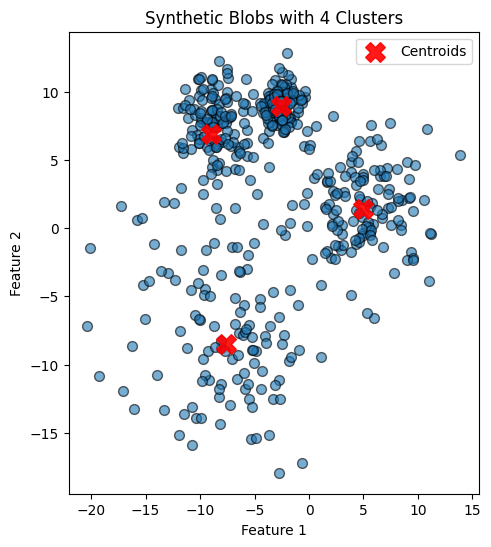

In [13]:
#creating synthetic data
X,y = make_blobs(n_samples=500,n_features=2, centers=4,cluster_std=[1.0, 3, 5, 2],random_state=42)
n_clusters = 4
kmeans=KMeans(n_clusters=no_clusters,random_state=42)
#applying Kmeans clusterin a predict an output
y_kmeans = kmeans.fit_predict(X)

colormap = cm.tab10

# Plot the blobs
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.6, edgecolor='k')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', alpha=0.9, label='Centroids')
plt.title(f'Synthetic Blobs with {n_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23408\3772221381.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


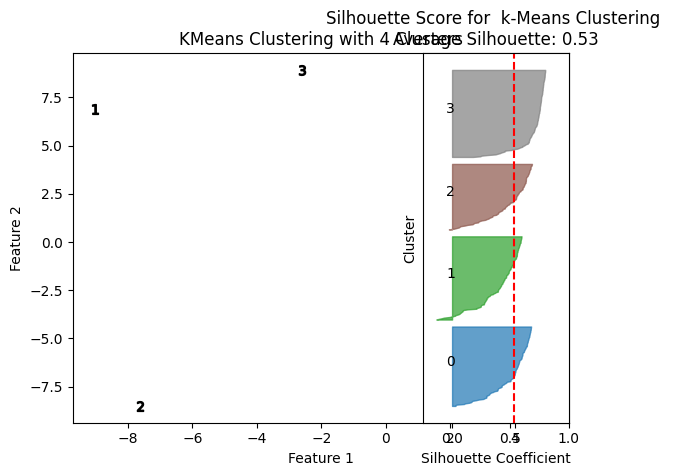

In [15]:
for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

plt.title(f'KMeans Clustering with {n_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Evaluate the clustering
plt.subplot(1, 3, 3)
eval_clustering(X, y_kmeans, n_clusters, title_suffix=' k-Means Clustering')
plt.show()